## Introdução
Olá seja bem-vinda ou bem-vindo ao notebook da aula01, nesta aula vamos realizar nossa primeira análise de dados e no final já seremos capazes de tirar algumas conclusões.

Nós estaremos desenvolvendo nosso projeto aqui no google colaboratory, assim podemos mesclar células contendo textos em formato markdown e células de código, além disso você não precisar instalar nada na sua máquina. Então que tal começar testando algumas linhas de código.

Nesta primeira célula estamos realizando um print(), lembre-se que esta função python imprime a string que estamos passando como parâmetro, então o retorno é exibido logo abaixo da célula com código.

In [1]:
print("Aline")

Aline


Agora vamos analisar a proxima célula de código. 

Aqui estamos fazendo uma atribuição de variável, conforme dito em aula, as atribuições não tem retorno, assim, diferente da célula anterior não temos um *output* logo abaixo do código.

In [2]:
nome_do_filme = "Totoro, o filme"

Agora que criamos a variável *nome_do_filme*, podemos reutilizá-la, por exemplo *print*, para assim imprimir a string "Totoro, o filme"

In [3]:
print(nome_do_filme)

Totoro, o filme


In [4]:
nome_do_filme

'Totoro, o filme'

## Lendo os dados do MovieLens
Nosso primeiro passo foi conhecer e realizar um "hello-world" no colab, agora chegou a hora de importar os dados para o notebook e começar as análises.

Vamos importar a biblioteca <a href="https://pandas.pydata.org/">pandas</a>, um poderoso projeto open source para análise de manipulação de dados. O primeiro passo é ler uma base de dados e podemos fazer isso com o comando ```pd.read_csv()```.

Estamos lendo um arquivo <b>CSV</b> (Comma-separated values), neste tipo de arquivo os valores são separados por vírgulas e podem ser abertos em outras ferramentas como excel e google-sheet. CSV não é o único formato lido pelo pandas, temos o ```pd.read_excel()``` que lê arquivos <b>xlsx</b> entre diversos outros formatos, você pode encontrar mais informações na seção de <a href="https://pandas.pydata.org/pandas-docs/stable/reference/io.html">input/output da documentação.</a>

Depois de ler o dataset, nós trocamos os nomes das colunas pelos termos em português, logo em seguida utilizamos o método ```filmes.head()``` para visualizar as primeiras 5 linhas do nosso dataframe. Outra forma de visualizar as informações dos dados é utilizando o método ```filmes.sample()```, se você tentar, vai verificar que ele retorna uma linha aleatória do seus dados. Para escolher aleatoriamente mais de 1 linha, por exemplo 5, é só passar esse valor desejado como parâmetro (```filmes.sample(5)```).

In [5]:
import pandas as pd

In [28]:
filmes = pd.read_csv(".\\ml-latest-small\\movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<p>Há pouco falamos para consultar a documentação para obter mais informações, mas será que é realmente preciso sair do notebook para tirar alguma dúvida mais simples?</p>
<p>Os notebooks facilitam a nossa vida podendo consultar o docstring das funções e métodos, rodando a célula com um <b>?</b> na frente da chamada, uma view é aberta com as informações resumidas. Veja a seguir alguns exemplos</p>

In [7]:
# lendo a documentação de um método/atributo
?filmes.head

Signature: filmes.head(n: int = 5) -> ~FrameOrSeries
Docstring:
Return the first `n` rows.

This function returns the first `n` rows for the object based
on position. It is useful for quickly testing if your object
has the right type of data in it.

For negative values of `n`, this function returns all rows except
the last `n` rows, equivalent to ``df[:-n]``.

Parameters
----------
n : int, default 5
    Number of rows to select.

Returns
-------
same type as caller
    The first `n` rows of the caller object.

See Also
--------
DataFrame.tail: Returns the last `n` rows.

Examples
--------
>>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
>>> df
      animal
0  alligator
1        bee
2     falcon
3       lion
4     monkey
5     parrot
6      shark
7      whale
8      zebra

Viewing the first 5 lines

>>> df.head()
      animal
0  alligator
1        bee
2     falcon
3       lion
4     monkey

V

In [8]:
# lendo a documentação do tipo (docstring)
?filmes

Type:        DataFrame
String form:
filmesId                                     titulo  \
           0            1                       <...>   Action|Animation
           9741                                       Comedy
           
           [9742 rows x 3 columns]
Length:      9742
File:        h:\programdata\anaconda3\lib\site-packages\pandas\core\frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects.

    .. versionchanged:: 0.23.0
       If data is a dict, column order follows insertion-order for
       Python 3.6 and later.

    .. versionchanged:: 0.25.0
   

<p>A base de dados que usamos até o momento contém o nome do filme, ano de lançamento e gêneros. O MovieLens conta com outras informações que estão em bases separadas, uma delas é a de avaliações.</p>
<p>Agora vamos analisar um pouco melhor o dataset de avaliações</p>

In [29]:
avaliacoes = pd.read_csv(".\\ml-latest-small\\ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Para visualizar algumas linhas estamos usando o ```.head()```, como ela mostra apenas as 5 primeiras linhas não sabemos qual é a quantidade de linhas que temos. Para descobrir a "forma" dos nossos dados podemos utilizar o ```avaliacoes.shape```, retornando uma <a href="https://www.alura.com.br/artigos/conhecendo-as-tuplas-no-python">tupla</a>, onde o primeiro termo indica o número de linhas e o segundo o número de colunas.

In [30]:
avaliacoes.shape

(100836, 4)

In [11]:
len(avaliacoes)

100836

<p>Vamos substituir os nomes das colunas de inglês para português e entender o que são essas colunas.</p>
<p>usuarioId => ID para usuário que votou em determinado filme.</p>
<p>filmeId => ID para identificar um filme votado.</p>
<p>nota => A nota dada pelo usuário para o respectivo filme.</p>
<p>momento => A data da votação que não está formatada como data.</p>
<p>Como cada linha contém um voto para o respectivo filme é de se esperar que um filme tenha diversos votos, mas repare que nas 5 primeiras çinhas temos o filme <b>1, 3, 6, 47, 50</b>. Mas e se eu quiser analisar apenas as notas do filme 1, como posso separar essa informação?</p>

In [31]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Uma forma para "separar" as informações apenas do <b>filmeId 1</b> é chamando o método ```avaliacoes.query("filmeId==1")```, esse método retornará apenas as linhas para as quais a expressão booleana, "filmeId==1", for verdadeira.
<p>Tendo as informações do <b>filmeId 1</b> podemos chamar o avaliacoes_do_filme_1.describe(), para analisar as estatísticas gerais dos dados</p>

In [32]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [14]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Caso queira uma estatística particular, podemos apenas chamar o método desejado, repare abaixo como calculamos apenas a média das avaliações do <b>filmeId 1.</b>

In [15]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

Calculamos as estatísticas apenas para o <b>filmeId 1</b>, mas também podemos chamar o método ```.describe()``` para a base completa (avaliações)

In [16]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


OK, nós calculamos um tanto de coisa usando ```.describe()``` e ```.mean()```, mas a informação que realmente queremos é a média da nota. Então o ponto é, como calcular a média apenas das notas?
<br>
A primeira coisa que precisamos fazer é selecionar apenas as informações de notas. Usando uma estrutura muito parecida com a de <a href="https://www.alura.com.br/artigos/trabalhando-com-o-dicionario-no-python">chave-valor dos dicionários python</a>
<br>
Com o comando ```avaliacoes["nota"]```, obtemos os valores da coluna nota (repare que o tipo retornado é uma Série pandas, por isso o index de cada nota é mantido). Para calcular a média de todas as notas executamos ```avaliacoes["notas"].means()```

In [17]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [18]:
avaliacoes["nota"].mean()

3.501556983616962

Nós calculamos uma média geral, uma média para o **filmeId 1**. Agora eu quero calcular a média das notas para todos os filmes, podemos fazer isso usando o método ```.groupby(filmeId)```, o parâmetro passado é para indicar qual coluna ele deve utilizar para "agrupar" os dados. Depois só calcular a média como fizemos anteriormente.

In [209]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Temos as notas médias calculadas, mas agora precisamos juntar as informações de notas médias com a base de dados de **filmes**.
<br>
Poderíamos criar uma nova coluna e atribuir a variável ```notas_medias_por_filme```, de forma direta:
```python
filmes["nota_media"] = notas_medias_por_filme
```
Como discutimos em aula, essa não é uma boa prática pois precisamos garantir que a nota média seja do respectivo filme.
<br>
Para garantir essa condição vamos utilizar o ```.join()```, criando um novo dataframe(```filmes_com_media = filmes.join(notas_medias_por_filme, on ="filmeId")```)
<br>
Veja como fazer nas células a seguir:

In [210]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [211]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [212]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Agora que temos as médias, que tal visualizar o nosso dataframe ordenado pela nota de forma decrescente?

In [213]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Fizemos um tanto de análise e manipulação de dados interessante, não é?
<br>
Mas diz a verdade, você está sentindo falta daquele gráfico que todo cientista de dados adora =D, então bora plotar nosso primeiro gráfico!
<br>
O pandas facilita muito o plot de alguns gráficos simples, apenas selecionamos a informação que gostaríamos de visualizar e chamamos o método ```.plot()```

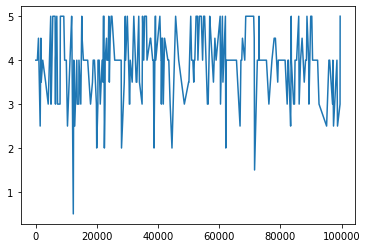

In [214]:
avaliacoes.query("filmeId == 1")["nota"].plot()

Por padrão o método plotou um gráfico de linhas, o que não é adequado para os dados que estamos analisando.
<br>
Precisamos mudar o tipo de gráfico para realizar uma análise mais adequada, para fazer isso apenas alteramos o parâmetro **kind** do método ```.plot```. Vamos plotar um <a href="https://pt.wikipedia.org/wiki/Histograma">histograma</a> rodando a célula a seguir.

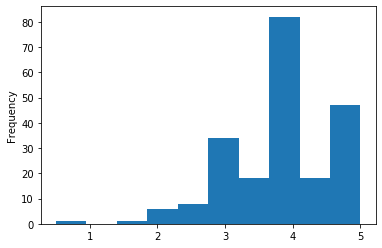

In [215]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

Legal, agora temos uma visualização muito mais agradável de analisar. Compare com o gráfico de linhas, qual você acha melhor para análise?
<br>
P.S.: Deixar de usar o gráfico de linhas, não significa que seja uma visualização ruim. Apenas quer dizer que nossos dados não tem caracterísitcas ideais para serem visualizados como um <i>line</i> plot, agora pense em uma <a href="https://pt.wikipedia.org/wiki/S%C3%A9rie_temporal">série temporal</a>. **Você acha que o gráfico de linhas ainda seria uma má ideia?**

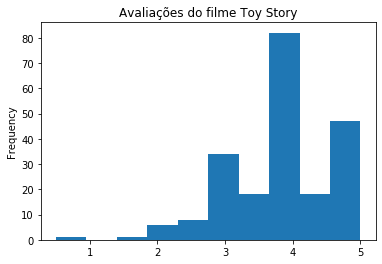

In [216]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist', 
                                              title="Avaliações do filme Toy Story")

Claro que python tem outras ferramentas muito poderosas para manipular gráficos, uma delas é o <a href="https://matplotlib.org/">matplotlib</a>.
<br>
Que tal experimentar um pouquinho esta poderosa ferramenta?
<br>
Vamos importar a lib e adicionar um título no gráfico usando o marplotlib, veja como fica na célular a seguir.

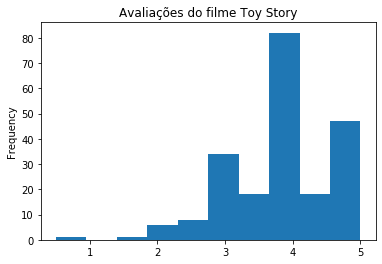

In [217]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

Agora que aprendemos a criar um histograma e manipular os gráficos, vamos plotar informações de outros filmes e realizar uma análise desses gráficos?
<br>
Vamos plotar o histograma do filme Jumanju e da animação Liga da Justiça: Doom

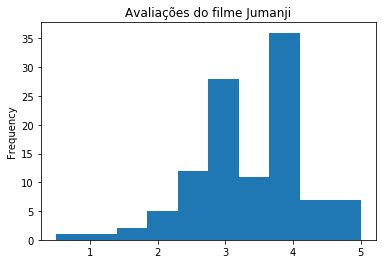

In [218]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist', 
                                              title="Avaliações do filme Jumanji")

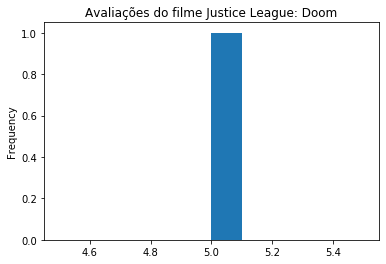

In [219]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

Agora que temos os gráficos, chegou a hora de analisar.

A primeira coisa que preciso saber é o que cada eixo do meu gráfico significa. Então, eixo **x** mostra a nota, enquanto eixo **y** a frequência das notas (quantas vezes determinada nota foi dada).

Entendido nosso gráfico, vamos contextualizar o cenário que estamos analisando:

* Temos 3 filmes, dois muito populares (Toy story e Jumanji) e outro que nenhuma pessoa presente no momento da aula conhecia (animação da liga da justiça). O ponto que chamou a atenção, foi que a animação tinha média de nota maior que dois filmes, aparentemente mais popular, Jumaji e Toy Story. **Será que a animação é um filme tão bom assim?**
Dado esse cenário a primeira coisa que me chama a atenção é a animação da liga da justiça ter média de nota igual a 5. Ao analisar o histograma do respectivo filme, verificamos que ele só teve uma avaliação igual a 5, logo, fica evidente que a **quantidade de votos é um aspecto importante na avaliação das médias**. Com apenas uma avaliação, não conseguimos garantir que o filme é realmente bom, tornando a avaliação muito "volátil". Imagina que Liga da Justiça receba mais uma avaliação, com nota 0, assim a média seria 2.5. Apenas com mais essa avaliação o filme passaria a ser considerada um "pior" que Jumanji e Toy Story.

Outro ponto interessante é comparar o histograma de Toy Story e Jumanji, ambos tem médias "relativamente próximas". Mas repare que a distribuição de notas são diferentes, Toy Story recebe mais notas 5 e 4 que qualquer outra nota, enquanto Jumanji recebe mais notas 4 e 3, assim concluímos que a **distribuição das notas também é um fator importante na avaliação das médias**.(Se ficar alguma dúvida sobre esse tema reveja o exemplo que o instrutor apresenta no final na aula)

Com isso nós fechamos a nossa primeira aula do **#quarentenadados**, viu quanta coisa aprendemos? Que tal colocar isso em prática?

**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês.**

Até a próxima aula!

# Desafio 1 do Paulo Silveira
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [220]:
# Considerando Filmes sem nota são filmes que o campo nota são iguais à NaN, vazios ou espaço
filmes_sem_nota = filmes_com_media.query("nota == 'NaN' or nota == '' or nota == ' '")
total_filmes_sem_nota = filmes_sem_nota["filmeId"].count()

Quantidade de filmes sem nota

In [221]:
total_filmes_sem_nota

18

Dataframe contendo os filmes sem nota

In [222]:
filmes_sem_nota

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2 do Guilherme Silveira
Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join

In [223]:
filmes_com_media.columns = ["filmeId", "titulo", "generos", "nota_media"]
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3 do Guilherme Silveira
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme

In [224]:
# Pegando o total de avaliações por filme e colocando na variável avaliacoes_por_filme
avaliacoes_por_filme = avaliacoes.groupby("filmeId")["nota"].count()

# Fazendo o join do avaliacoes_por_filme com o filmes_com_media no "filmeId" e colocando na variável
# filmes_com_media_avaliacoes
filmes_com_media_avaliacoes = filmes_com_media.join(avaliacoes_por_filme, on="filmeId")
# Renomeando a última coluna para "total_avaliacoes"
filmes_com_media_avaliacoes.columns = ["filmeId", "titulo", "generos", "nota_media", "total_avaliacoes"]
filmes_com_media_avaliacoes.head()

,filmeId,titulo,generos,nota_media,total_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4 do Thiago Gonçalves
Arredondar as médias (coluna de nota média) para duas casas decimais

In [225]:
# Alterando o campo nota_media no df filmes_com_media
filmes_com_media.nota_media = filmes_com_media.nota_media.round(2)
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


In [226]:
# Alterando o campo nota_media no df filmes_com_media_avaliacoes
filmes_com_media_avaliacoes.nota_media = filmes_com_media_avaliacoes.nota_media.round(2)
filmes_com_media_avaliacoes.head()

,filmeId,titulo,generos,nota_media,total_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


# Desafio 5 do Allan Spadini
Descobrir os gêneros dos filmes (quais são eles, únicos).

In [227]:
# Removendo os valores duplicados da coluna gênero antes de separar os valores dentro da coluna
generos = pd.Series(filmes["generos"].unique())
generos.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
dtype: object

In [228]:
# Separando os valores de dentro de cada coluna e colocando dentro de um set
set_generos = set()
for x in generos.str.split('|'):
    for y in x:
        set_generos.add(y)
set_generos

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Desafio 6 da Thais André
Contar o número de aparições de cada gênero

In [271]:
# Convertendo set_generos para uma lista ordenada
list_generos = sorted(list(set_generos))
# Criando um DataFrame vazio
df_generos = pd.DataFrame()
# Adicionando a primeira coluna gêneros a partir da list_generos
df_generos["generos"] = list_generos
# Adicionando a segunda coluna aparições feita a partir da contagem das aparições de cada gênero dentro de filmes["generos"]
df_generos["aparicoes"] = [len([x for x in filmes["generos"] if y in x]) for y in list_generos]
df_generos

,generos,aparicoes
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756
6,Crime,1199
7,Documentary,440
8,Drama,4361
9,Fantasy,779


# Desafio 7 do Guilherme Silveira
Plotar o gráfico de aparições de cada gênero. Pode ser um gráfico de tipo igual a barra

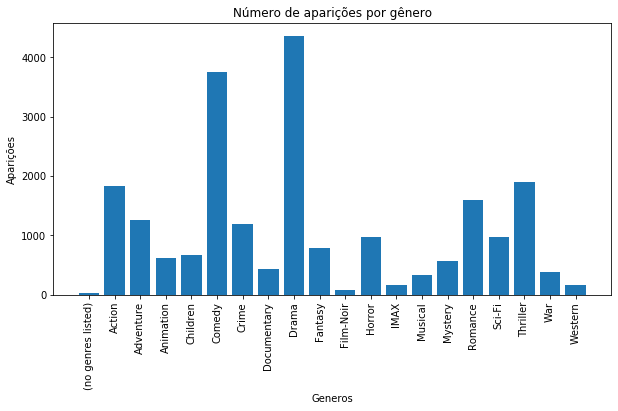

In [286]:
# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 5), tight_layout=False)
# Girando as labels do eixo x para que sejam visualizadas corretamente
ax.tick_params(axis='x', rotation=90)
# Gerando o gráfico de barras baseado no DataFrame df_generos
ax.bar(df_generos["generos"],df_generos["aparicoes"],align='center')
plt.xlabel('Generos')
plt.ylabel('Aparições')
plt.title('Número de aparições por gênero')
plt.show()